In [1]:
#Import numpy and matplotlib.pyplot libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define Example 1
def examp1_rhs(t, y):
    dydt = -1000*y + np.exp(-2*t)
    return dydt


# Define Example 2
def examp2_rhs(t, X):
    x, y = X
    dxdt = 998*x + 1998*y
    dydt = -999*x - 1999*y
    return np.array([dxdt, dydt])


# Define Example 3
def examp3_rhs(t, X):
    x, y = X
    dxdt = -2*x + y +2*np.sin(t)
    dydt = 998*x -999*y + 999*np.cos(t) -999*np.sin(t)
    return np.array([dxdt, dydt])


# Define Example 4
def examp4_rhs(t, X):
    x, y, z = X
    dxdt = -0.1*x - 49.9*y
    dydt = -50*y
    dzdt = 70*y - 120*z
    return np.array([dxdt, dydt, dzdt])


# Define Example 5
def examp5_rhs(t, X):
    theta, omega = X
    g = 9.81
    l = 1
    dthetadt = omega
    domegadt = -(g/l)*np.sin(theta)
    return np.array([dthetadt, domegadt])

In [3]:
# Define analytical solution for Example 1
def analyt_examp1(t):
    yt = (1/998)*(np.exp(-2*t) - np.exp(-1000*t))
    return yt


# Define analytical solution for Example 2
def analyt_examp2(t):
    xt = -5*np.exp(-1000*t) + 6*np.exp(-t)
    yt = 5*np.exp(-1000*t) - 3*np.exp(-t)
    return xt, yt


# Define analytical solution for Example 3
def analyt_examp3(t):
    xt = 2*np.exp(-t) + np.sin(t)
    yt = 2*np.exp(-t) + np.cos(t)
    return xt, yt


# Define analytical solution for Example 4
def analyt_examp4(t):
    xt = np.exp(-0.1*t) + np.exp(-50*t)
    yt = np.exp(-50*t)
    zt = np.exp(-50*t) + np.exp(-120*t)
    return xt, yt, zt


# Define analytical linearized solution for Example 5
def analyt_examp5(t):
    g = 9.81
    l = 1
    thetat = 0.2*np.cos(np.sqrt(g/l)*t)
    return thetat

In [4]:
#Define the EOIPM for Example 1
def taylor8_examp1(rhs, y0, interval, h):
    t = np.arange(interval[0], interval[1] + h, h)

    
    y = np.zeros(t.shape[0])
    y[0] = y0
    
    #Find all the eight derivatives 
    for i in range(len(t) - 1):
        f1 = rhs(t[i], y[i])
        f2 = -1000*f1 - 2*np.exp(-2*t[i])
        f3 = -1000*f2 + 4*np.exp(-2*t[i])
        f4 = -1000*f3 - 8*np.exp(-2*t[i])
        f5 = -1000*f4 + 16*np.exp(-2*t[i])
        f6 = -1000*f5 - 32*np.exp(-2*t[i])
        f7 = -1000*f6 + 64*np.exp(-2*t[i])
        f8 = -1000*f7 - 128*np.exp(-2*t[i])
        
        #Calculate each term of the Taylor Expansion
        G1 = h*f1 
        G2 = ((h**2)/2)*f2
        G3 = ((h**3)/6)*f3 
        G4 = ((h**4)/24)*f4 
        G5 = ((h**5)/120)*f5 
        G6 = ((h**6)/720)*f6
        G7 = ((h**7)/5040)*f7 
        G8 = ((h**8)/40320)*f8 
        
        #Calculate the numerical approximation (numerical solution)
        y[i+1] = y[i] + G1 + G2 + G3 + G4 + G5 + G6 + G7 + G8
      
    return t, y

In [5]:
#Define the EOIPM for Example 2
def taylor8_examp2(rhs, y0, interval, h):
    t = np.arange(interval[0], interval[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    
    #Find all the eight derivatives for each equation
    for i in range(len(t) - 1):
        f1 = rhs(t[i], y[i, :])
        f2 = rhs(t[i], f1)
        f3 = rhs(t[i], f2)
        f4 = rhs(t[i], f3)
        f5 = rhs(t[i], f4)
        f6 = rhs(t[i], f5)
        f7 = rhs(t[i], f6)
        f8 = rhs(t[i], f7)
        
        #Calculate each term of the Taylor Expansion
        G1 = h*f1 
        G2 = ((h**2)/2)*f2
        G3 = ((h**3)/6)*f3 
        G4 = ((h**4)/24)*f4 
        G5 = ((h**5)/120)*f5 
        G6 = ((h**6)/720)*f6
        G7 = ((h**7)/5040)*f7 
        G8 = ((h**8)/40320)*f8 
        
        #Calculate the numerical approximation (numerical solution)
        y[i + 1, :] = y[i, :] + G1 + G2 + G3 + G4 + G5 + G6 + G7 + G8

    return t, y

In [6]:
#Define the EOIPM for Example 3
def taylor8_examp3(rhs, y0, interval, h):
    t = np.arange(interval[0], interval[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    
    #Find all the eight derivatives for each equation
    for i in range(len(t) - 1):
        f1 = rhs(t[i], y[i, :])
        f2 = np.array([-2*f1[0] + f1[1] + 2*np.cos(t[i]),998*f1[0] -999*f1[1] - 999*np.sin(t[i]) - 999*np.cos(t[i])])
        f3 = np.array([-2*f2[0] + f2[1] - 2*np.sin(t[i]),998*f2[0] -999*f2[1] + 999*np.sin(t[i]) - 999*np.cos(t[i])])
        f4 = np.array([-2*f3[0] + f3[1] - 2*np.cos(t[i]),998*f3[0] -999*f3[1] + 999*np.sin(t[i]) + 999*np.cos(t[i])])
        f5 = np.array([-2*f4[0] + f4[1] + 2*np.sin(t[i]),998*f4[0] -999*f4[1] - 999*np.sin(t[i]) + 999*np.cos(t[i])])
        f6 = np.array([-2*f5[0] + f5[1] + 2*np.cos(t[i]),998*f5[0] -999*f5[1] - 999*np.sin(t[i]) - 999*np.cos(t[i])])
        f7 = np.array([-2*f6[0] + f6[1] - 2*np.sin(t[i]),998*f6[0] -999*f6[1] + 999*np.sin(t[i]) - 999*np.cos(t[i])])
        f8 = np.array([-2*f7[0] + f7[1] - 2*np.cos(t[i]),998*f7[0] -999*f7[1] + 999*np.sin(t[i]) + 999*np.cos(t[i])])
        
        #Calculate each term of the Taylor Expansion
        G1 = h*f1 
        G2 = ((h**2)/2)*f2
        G3 = ((h**3)/6)*f3 
        G4 = ((h**4)/24)*f4 
        G5 = ((h**5)/120)*f5 
        G6 = ((h**6)/720)*f6
        G7 = ((h**7)/5040)*f7 
        G8 = ((h**8)/40320)*f8 
        
        #Calculate the numerical approximation (numerical solution)
        y[i + 1, :] = y[i, :] + G1 + G2 + G3 + G4 + G5 + G6 + G7 + G8

    return t, y

In [7]:
#Define the EOIPM for Example 4
def taylor8_examp4(rhs, y0, interval, h):
    t = np.arange(interval[0], interval[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    
    #Find all the eight derivatives for each equation
    for i in range(len(t) - 1):
        f1 = rhs(t[i], y[i, :])
        f2 = rhs(t[i], f1)
        f3 = rhs(t[i], f2)
        f4 = rhs(t[i], f3)
        f5 = rhs(t[i], f4)
        f6 = rhs(t[i], f5)
        f7 = rhs(t[i], f6)
        f8 = rhs(t[i], f7)
        
        #Calculate each term of the Taylor Expansion
        G1 = h*f1 
        G2 = ((h**2)/2)*f2
        G3 = ((h**3)/6)*f3 
        G4 = ((h**4)/24)*f4 
        G5 = ((h**5)/120)*f5 
        G6 = ((h**6)/720)*f6
        G7 = ((h**7)/5040)*f7 
        G8 = ((h**8)/40320)*f8 
        
        #Calculate the numerical approximation (numerical solution)
        y[i + 1, :] = y[i, :] + G1 + G2 + G3 + G4 + G5 + G6 + G7 + G8
         
    return t, y

In [8]:
#Define the EOIPM for Example 5
def taylor8_examp5(rhs, y0, interval, h):
    g = 9.81
    l = 1

    t_taylor = np.arange(interval[0], interval[1] + h, h)
    dt = h
    theta_taylor = np.zeros(len(t_taylor))
    theta_taylor[0] = y0[0]
    theta_dot_taylor = np.zeros(len(t_taylor))
    theta_dot_taylor[0] = y0[1]
    
    #Find all the eight derivatives
    for i in range(len(t_taylor)-1):
        theta = theta_taylor[i]
        theta_dot = theta_dot_taylor[i]
        theta_double_dot = -g/l * np.sin(theta)
        theta_triple_dot = -g/l * np.cos(theta) * theta_dot
        theta_fourth_dot = -g/l * (-np.sin(theta) * theta_dot**2 + np.cos(theta) * theta_double_dot)
        theta_fifth_dot = -g/l * (np.cos(theta) * theta_dot**3 + 3 * np.sin(theta) * theta_dot * theta_double_dot + np.cos(theta) * theta_triple_dot)
        theta_sixth_dot = -g/l * (3 * np.cos(theta) * theta_dot**2 * theta_double_dot + np.sin(theta) * theta_double_dot**2 + 3 * np.sin(theta) * theta_dot * theta_triple_dot + np.cos(theta) * theta_fourth_dot)
        theta_seventh_dot = -g/l * (-np.cos(theta) * theta_dot**4 - 6 * np.sin(theta) * theta_dot**2 * theta_double_dot - 4 * np.cos(theta) * theta_double_dot**2 - 6 * np.sin(theta) * theta_dot * theta_triple_dot + np.cos(theta) * theta_fifth_dot)
        theta_eighth_dot = -g/l * (-10 * np.cos(theta) * theta_dot**3 * theta_double_dot - 15 * np.sin(theta) * theta_dot * theta_double_dot**2 - 10 * np.sin(theta) * theta_dot**2 * theta_triple_dot + np.cos(theta) * theta_sixth_dot)
    
    #Calculate each term of the Taylor Expansion and Calculate the numerical approximation (numerical solution)
        theta_taylor[i+1] = theta + theta_dot * dt + theta_double_dot * (dt**2)/2 + theta_triple_dot * (dt**3)/6 + theta_fourth_dot * (dt**4)/24 + theta_fifth_dot * (dt**5)/120 + theta_sixth_dot * (dt**6)/720 + theta_seventh_dot * (dt**7)/5040 + theta_eighth_dot * (dt**8)/40320
        theta_dot_taylor[i+1] = theta_dot + theta_double_dot * dt + theta_triple_dot * (dt**2)/2 + theta_fourth_dot * (dt**3)/6 + theta_fifth_dot * (dt**4)/24 + theta_sixth_dot * (dt**5)/120 + theta_seventh_dot * (dt**6)/720 + theta_eighth_dot * (dt**7)/5040
    
    return t_taylor, theta_taylor

In [9]:
#Define the RKF45 for Example 1
def RKF45_examp1(rhs, y0, interval, h):
    t = np.arange(interval[0], interval[1] + h, h)
    y = np.zeros(t.shape[0])
    y[0] = y0

    #Find all the function Evaluations
    for i in range(len(t) - 1):
        k1 = h * rhs(t[i], y[i])
        k2 = h * rhs(t[i] + h/4, y[i] + k1/4)
        k3 = h * rhs(t[i] + 3*h/8, y[i] + 3*k1/32 + 9*k2/32)
        k4 = h * rhs(t[i] + 12*h/13, y[i] + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h * rhs(t[i] + h, y[i] + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h * rhs(t[i] + h/2, y[i] - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

        #Calculate the numerical approximation (numerical solution)
        y[i + 1] = y[i] + (16/135)*k1 + (6656/12825)*k3 + (28561/56430)*k4 - 9/50*k5 + 2/55*k6
        
    return t, y

In [10]:
#Define the RKF45 for Examples 2-5
def RKF45(rhs, y0, interval, h):
    t = np.arange(interval[0], interval[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    
    #Find all the function Evaluations
    for i in range(len(t) - 1):
        k1 = h * rhs(t[i], y[i, :])
        k2 = h * rhs(t[i] + h/4, y[i, :] + k1/4)
        k3 = h * rhs(t[i] + 3*h/8, y[i, :] + 3*k1/32 + 9*k2/32)
        k4 = h * rhs(t[i] + 12*h/13, y[i, :] + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h * rhs(t[i] + h, y[i, :] + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h * rhs(t[i] + h/2, y[i, :] - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

        #Calculate the numerical approximation (numerical solution)
        y[i + 1, :] = y[i, :] + (16/135)*k1 + (6656/12825)*k3 + (28561/56430)*k4 - 9/50*k5 + 2/55*k6
        
    return t, y

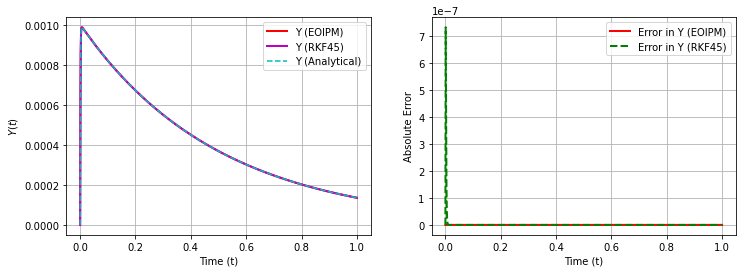

In [11]:
#Plotting Example 2 Numerical Solutions and their corresponding errors
interval1 = [0,1]
y01 = 0
h1 = 0.001

#Finding the Numerical Solutions
t_tay1, y_tay1 = taylor8_examp1(examp1_rhs, y01, interval1, h1)
t_rkf1, y_rkf1 = RKF45_examp1(examp1_rhs, y01, interval1, h1)
y_analyt1 = analyt_examp1(t_tay1)

#Finding the Absolute Errors
tay1_error = np.abs(y_tay1 - y_analyt1)
rkf1_error = np.abs(y_rkf1 - y_analyt1)

#Plotting the Numerical Solutions
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t_tay1, y_tay1, 'r', label='Y (EOIPM)', linewidth=2)
plt.plot(t_rkf1, y_rkf1, 'm', label='Y (RKF45)', linewidth=2)
plt.plot(t_tay1, y_analyt1, 'c--', label='Y (Analytical)', linewidth=1.5)

plt.legend()
plt.xlabel('Time (t)')
plt.ylabel(r'$Y(t)$')
# plt.title('Numerical Example 1')
plt.grid(True)

#Plotting the Absolute Errors (AE)
plt.subplot(1,2,2)
plt.plot(t_tay1, tay1_error, 'r', label='Error in Y (EOIPM)', linewidth=2)
plt.plot(t_rkf1, rkf1_error, 'g--', label='Error in Y (RKF45)', linewidth=2)

plt.legend()
plt.xlabel('Time (t)')
plt.ylabel('Absolute Error')
# plt.title('Error of Example 1')
plt.grid(True)


plt.show()

In [12]:
#Finding the final Absolute errors (AE) for Example 1 using a particular step size
interval1 = [0,1]
y01 = 0
h1 = 0.001

t_tay1, y_tay1 = taylor8_examp1(examp1_rhs, y01, interval1, h1)
t_rkf1, y_rkf1 = RKF45_examp1(examp1_rhs, y01, interval1, h1)
y_analyt1 = analyt_examp1(t_tay1)

tay1_error = np.abs(y_tay1 - y_analyt1)
rkf1_error = np.abs(y_rkf1 - y_analyt1)

print('h         Time        Abs_Error_Taylor_Y          Abs_Error_RKF_Y')

# for i in range(len(t)):
print(f'{h1}     {t_tay1[-1]:.2f}       {tay1_error[-1]:.12f}              {rkf1_error[-1]:.12f}')


h         Time        Abs_Error_Taylor_Y          Abs_Error_RKF_Y
0.001     1.00       0.000000000000              0.000000000001


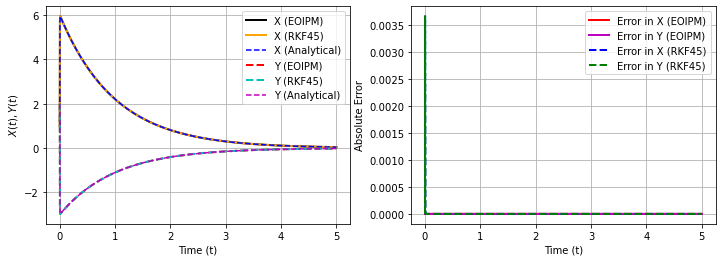

In [13]:
#Plotting Example 2 Numerical Solutions and their corresponding errors
interval2 = [0,5]
y02 = [1,2]
h2 = 0.001

#Finding the Numerical Solutions
t_tay2, y_tay2 = taylor8_examp2(examp2_rhs, y02, interval2, h2)
t_rkf2, y_rkf2 = RKF45(examp2_rhs, y02, interval2, h2)
y_analyt2 = analyt_examp2(t_tay2)


#Finding the Absolute Errors
tay2_error = np.abs(y_tay2.T - y_analyt2)
rkf2_error = np.abs(y_rkf2.T - y_analyt2)

#Plotting the Numerical Solutions
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t_tay2, y_tay2[:,0], 'black', label='X (EOIPM)', linewidth=2)
plt.plot(t_rkf2, y_rkf2[:,0], 'orange', label='X (RKF45)', linewidth=2)
plt.plot(t_tay2, y_analyt2[0], 'b--', label='X (Analytical)', linewidth=1.5)

plt.plot(t_tay2, y_tay2[:,1], 'r--', label='Y (EOIPM)', linewidth=2)
plt.plot(t_rkf2, y_rkf2[:,1], 'c--', label='Y (RKF45)', linewidth=2)
plt.plot(t_tay2, y_analyt2[1], 'm--', label='Y (Analytical)', linewidth=1.5)

plt.legend()
plt.xlabel('Time (t)')
plt.ylabel(r'$X(t),Y(t)$')
# plt.title('Numerical Example 2')
plt.grid(True)

#Plotting the Absolute Errors (AE)
plt.subplot(1,2,2)
plt.plot(t_tay2, tay2_error[0], 'r', label='Error in X (EOIPM)', linewidth=2)
plt.plot(t_tay2, tay2_error[1], 'm', label='Error in Y (EOIPM)', linewidth=2)
plt.plot(t_rkf2, rkf2_error[0], 'b--', label='Error in X (RKF45)', linewidth=2)
plt.plot(t_rkf2, rkf2_error[1], 'g--', label='Error in Y (RKF45)', linewidth=2)
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel('Absolute Error')
# plt.title('Error of Example 2')
plt.grid(True)


plt.show()

In [14]:
#Finding the final Absolute errors (AE) for Example 2 using a particular step size
interval2 = [0,5]
y02 = [1,2]
h2 = 0.001

t_tay2, y_tay2 = taylor8_examp2(examp2_rhs, y02, interval2, h2)
t_rkf2, y_rkf2 = RKF45(examp2_rhs, y02, interval2, h2)
y_analyt2 = analyt_examp2(t_tay2)

tay2_error = np.abs(y_tay2.T - y_analyt2)
rkf2_error = np.abs(y_rkf2.T - y_analyt2)

print('h         Time        Abs_Error_Taylor_Y          Abs_Error_RKF_Y')

# for i in range(len(t)):
print(f'{h2}     {t_tay2[-1]:.2f}       {tay2_error[1][-1]:.12f}              {rkf2_error[1][-1]:.12f}')


h         Time        Abs_Error_Taylor_Y          Abs_Error_RKF_Y
0.001     5.00       0.000000000000              0.000000000000


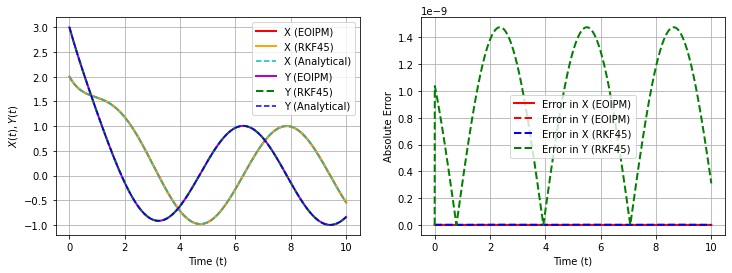

In [15]:
#Plotting Example 3 Numerical Solutions and their corresponding errors
interval3 = [0,10]
y03 = [2,3]
h3 = 0.001

#Finding the Numerical Solutions
t_tay3, y_tay3 = taylor8_examp3(examp3_rhs, y03, interval3, h3)
t_rkf3, y_rkf3 = RKF45(examp3_rhs, y03, interval3, h3)
y_analyt3 = analyt_examp3(t_tay3)


#Finding the Absolute Errors
tay3_error = np.abs(y_tay3.T - y_analyt3)
rkf3_error = np.abs(y_rkf3.T - y_analyt3)

#Plotting the Numerical Solutions
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t_tay3, y_tay3[:,0], 'r', label='X (EOIPM)', linewidth=2)
plt.plot(t_rkf3, y_rkf3[:,0], 'orange', label='X (RKF45)', linewidth=2)
plt.plot(t_tay3, y_analyt3[0], 'c--',label='X (Analytical)', linewidth=1.5)

plt.plot(t_tay3, y_tay3[:,1], 'm', label='Y (EOIPM)', linewidth=2)
plt.plot(t_rkf3, y_rkf3[:,1], 'g--', label='Y (RKF45)', linewidth=2)
plt.plot(t_tay3, y_analyt3[1], 'b--', label='Y (Analytical)', linewidth=1.5)
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel(r'$X(t), Y(t)$')
# plt.title('Numerical Example 3')
plt.grid(True)

#Plotting the Absolute Errors (AE)
plt.subplot(1,2,2)
plt.plot(t_tay3, tay3_error[0], 'r', label='Error in X (EOIPM)', linewidth=2)
plt.plot(t_tay3, tay3_error[1], 'r--', label='Error in Y (EOIPM)', linewidth=2)
plt.plot(t_rkf3, rkf3_error[0], 'b--', label='Error in X (RKF45)', linewidth=2)
plt.plot(t_rkf3, rkf3_error[1], 'g--', label='Error in Y (RKF45)', linewidth=2)
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel('Absolute Error')
# plt.title('Eror of Example 3')
plt.grid(True)


plt.show()

In [16]:
#Finding the final Absolute errors (AE) for Example 3 using a particular step size
interval3 = [0,10]
y03 = [2,3]
h3 = 0.001

t_tay3, y_tay3 = taylor8_examp3(examp3_rhs, y03, interval3, h3)
t_rkf3, y_rkf3 = RKF45(examp3_rhs, y03, interval3, h3)
y_analyt3 = analyt_examp3(t_tay3)

tay3_error = np.abs(y_tay3.T - y_analyt3)
rkf3_error = np.abs(y_rkf3.T - y_analyt3)

print('h         Time        Abs_Error_Taylor_Y          Abs_Error_RKF_Y')

# for i in range(len(t)):
print(f'{h3}     {t_tay3[-1]:.2f}       {tay3_error[1][-1]:.12f}              {rkf3_error[1][-1]:.12f}')


h         Time        Abs_Error_Taylor_Y          Abs_Error_RKF_Y
0.001     10.00       0.000000000000              0.000000000310


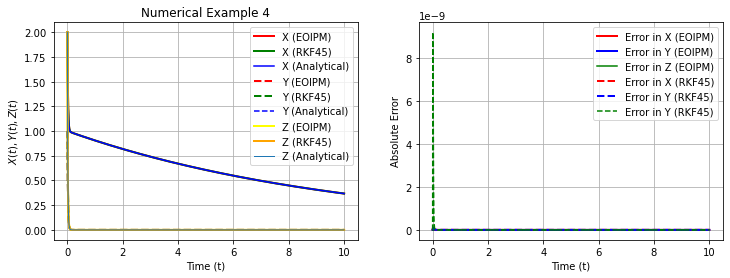

In [17]:
#Plotting Example 4 Numerical Solutions and their corresponding errors
interval4 = [0,10]
y04 = [2,1,2]
h4 = 0.001

#Finding the Numerical Solutions
t_tay4, y_tay4 = taylor8_examp4(examp4_rhs, y04, interval4, h4)
t_rkf4, y_rkf4 = RKF45(examp4_rhs, y04, interval4, h4)
y_analyt4 = analyt_examp4(t_tay4)


#Finding the Absolute Errors
tay4_error = np.abs(y_tay4.T - y_analyt4)
rkf4_error = np.abs(y_rkf4.T - y_analyt4)

#Plotting the Numerical Solutions
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t_tay4, y_tay4[:,0], 'red', label='X (EOIPM)', linewidth=2)
plt.plot(t_rkf4, y_rkf4[:,0], 'green', label='X (RKF45)', linewidth=2)
plt.plot(t_tay4, y_analyt4[0], 'blue', label='X (Analytical)', linewidth=1.5)

plt.plot(t_tay4, y_tay4[:,1], 'r--', label='Y (EOIPM)', linewidth=2)
plt.plot(t_rkf4, y_rkf4[:,1], 'g--', label='Y (RKF45)', linewidth=2)
plt.plot(t_tay4, y_analyt4[1], 'b--', label='Y (Analytical)', linewidth=1.5)

plt.plot(t_tay4, y_tay4[:,2], 'yellow', label='Z (EOIPM)', linewidth=2)
plt.plot(t_rkf4, y_rkf4[:,2], 'orange', label='Z (RKF45)', linewidth=2)
plt.plot(t_tay4, y_analyt4[2], label='Z (Analytical)', linewidth=1)
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel(r'$X(t),Y(t),Z(t)$')
#plt.title('Numerical Example 4')
plt.grid(True)

#Plotting the Absolute Errors (AE)
plt.subplot(1,2,2)
plt.plot(t_tay4, tay4_error[0], 'red', label='Error in X (EOIPM)', linewidth=2)
plt.plot(t_tay4, tay4_error[1], 'blue', label='Error in Y (EOIPM)', linewidth=2)
plt.plot(t_tay4, tay4_error[2], 'green', label='Error in Z (EOIPM)', linewidth=1.5)
plt.plot(t_rkf4, rkf4_error[0], 'r--', label='Error in X (RKF45)', linewidth=2)
plt.plot(t_rkf4, rkf4_error[1], 'b--', label='Error in Y (RKF45)', linewidth=2)
plt.plot(t_rkf4, rkf4_error[2], 'g--', label='Error in Y (RKF45)', linewidth=1.5)
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel('Absolute Error')
# plt.title('Eror of Example 4')
plt.grid(True)


plt.show()

In [18]:
#Finding the final Absolute errors (AE) for Example 4 using a particular step size
interval4 = [0,10]
y04 = [2,1,2]
h4 = 0.01

t_tay4, y_tay4 = taylor8_examp4(examp4_rhs, y04, interval4, h4)
t_rkf4, y_rkf4 = RKF45(examp4_rhs, y04, interval4, h4)
y_analyt4 = analyt_examp4(t_tay4)

tay4_error = np.abs(y_tay4.T - y_analyt4)
rkf4_error = np.abs(y_rkf4.T - y_analyt4)

print('h         Time        Abs_Error_Taylor_Z          Abs_Error_RKF_Z')

# for i in range(len(t)):
print(f'{h4}     {t_tay4[-1]:.2f}       {tay4_error[2][-1]:.12f}              {rkf4_error[2][-1]:.12f}')


h         Time        Abs_Error_Taylor_Z          Abs_Error_RKF_Z
0.01     10.00       0.000000000000              0.000000000000


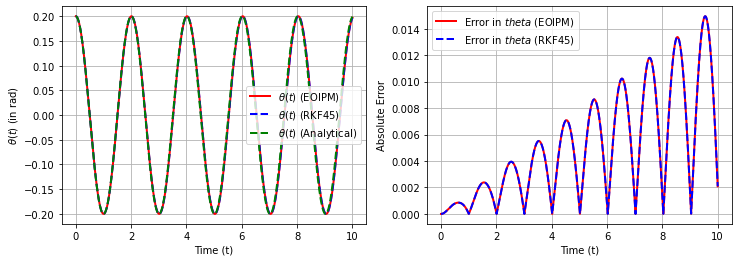

In [19]:
#Plotting Example 5 Numerical Solutions and their corresponding errors
interval5 = [0,10]
y05 = [0.2,0]
h5 = 0.001

#Finding the Numerical Solutions
t_tay5, y_tay5 = taylor8_examp5(examp5_rhs, y05, interval5, h5)
t_rkf5, y_rkf5 = RKF45(examp5_rhs, y05, interval5, h5)
y_analyt5 = analyt_examp5(t_tay5)

#Finding the Absolute Errors
tay5_error = np.abs(y_tay5 - y_analyt5)
rkf5_error = np.abs(y_rkf5[:,0] - y_analyt5)

#Plotting the Numerical Solutions
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t_tay5, y_tay5, 'r', label=r'$\theta(t)$ (EOIPM)', linewidth=2)
plt.plot(t_rkf5, y_rkf5[:,0], 'b--', label=r'$\theta(t)$ (RKF45)', linewidth=2)
plt.plot(t_tay5, y_analyt5, 'g--', label=r'$\theta(t)$ (Analytical)', linewidth=2)
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel(r'$\theta(t)$ (in rad)')
# plt.title('Numerical Example 5')
plt.grid(True)

#Plotting the Absolute Errors (AE)
plt.subplot(1,2,2)
plt.plot(t_tay5, tay5_error, 'r', label='Error in $theta$ (EOIPM)', linewidth=2)
plt.plot(t_rkf5, rkf5_error, 'b--', label='Error in $theta$ (RKF45)', linewidth=2)
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel('Absolute Error')
# plt.title('Eror of Example 5')
plt.grid(True)


plt.show()

In [20]:
#Finding the final Absolute errors (AE) for Example 5 using a particular step size
interval5 = [0,10]
y05 = [0.2,0]
h5 = 0.001

t_tay5, y_tay5 = taylor8_examp5(examp5_rhs, y05, interval5, h5)
t_rkf5, y_rkf5 = RKF45(examp5_rhs, y05, interval5, h5)
y_analyt5 = analyt_examp5(t_tay5)

tay5_error = np.abs(y_tay5 - y_analyt5)
rkf5_error = np.abs(y_rkf5[:,0] - y_analyt5)

print('h         Time        Abs_Error_Taylor_theta          Abs_Error_RKF_theta')

# for i in range(len(t)):
print(f'{h5}     {t_tay5[-1]:.2f}          {tay5_error[-1]:.12f}              {rkf5_error[-1]:.12f}')


h         Time        Abs_Error_Taylor_theta          Abs_Error_RKF_theta
0.001     10.00          0.002088698318              0.002088698319
